In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from photometric_stereo.psvizualization import plotar_mapa_altura_3d, plotar_canais, plotar_canais_3d

In [2]:
def normal_to_height(normal_map, scale=1.0):
    """
    Converte um mapa de normal em um mapa de altura.
    :param normal_map: Mapa de normal no intervalo [-1, 1]
    :param scale: Fator de escala para os gradientes.
    :return: Mapa de altura.
    """
    # Extrai as componentes x, y e z
    nx = normal_map[:, :, 0] #* 2 - 1  # Componente X (convertida para -1 a 1)
    ny = -normal_map[:, :, 1] #* 2 - 1  # Componente Y
    #nz = normal_map[:, :, 2] #* 2 - 1  # Componente Z (geralmente não usado para altura)

    # Inicializa o mapa de altura como uma matriz zerada
    height_map = np.zeros_like(nx, dtype=np.float32)
    
    # Integra os gradientes para calcular o mapa de altura
    for y in range(1, height_map.shape[0]):
        for x in range(1, height_map.shape[1]):
            height_map[y, x] = (
                height_map[y - 1, x] + ny[y, x] * scale +
                height_map[y, x - 1] + nx[y, x] * scale
            ) / 2  # Média entre os gradientes acumulados

    # Normaliza o mapa de altura para o intervalo [0, 1]
    min_val, max_val = np.min(height_map), np.max(height_map)
    print(f"Valores mínimos e máximos do mapa de altura: {min_val}, {max_val}")
    height_map = (height_map - min_val) / (max_val - min_val)

    return height_map

Informações estatísticas dos canais:
Canal 0:
  Mínimo: -0.6345571580655975
  Máximo: 0.6418279743960404
  Média: 0.0005428178327559195
  Desvio Padrão: 0.14091830552570997
Canal 1:
  Mínimo: -0.7206764706668194
  Máximo: 0.6584229996485673
  Média: -0.0029403803377575123
  Desvio Padrão: 0.14465597786379472
Canal 2:
  Mínimo: 0.0
  Máximo: 0.9999876261494695
  Média: 0.15549372324088112
  Desvio Padrão: 0.3358486762801292


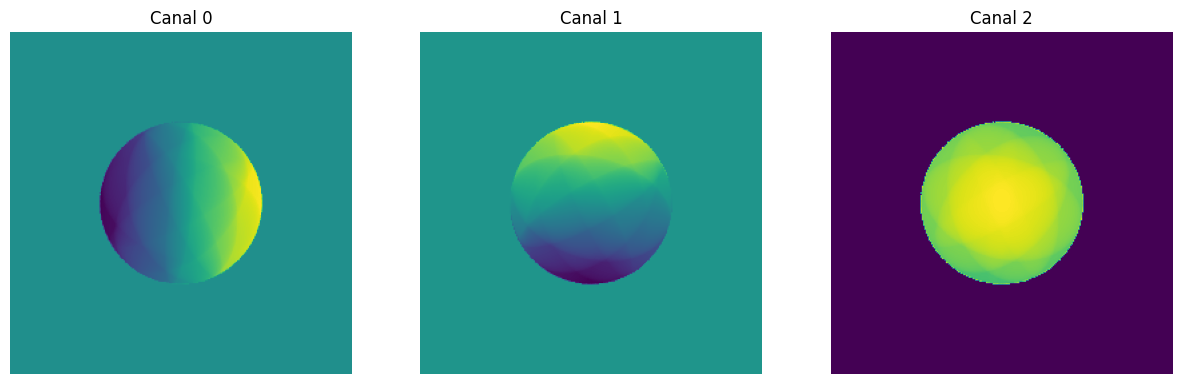

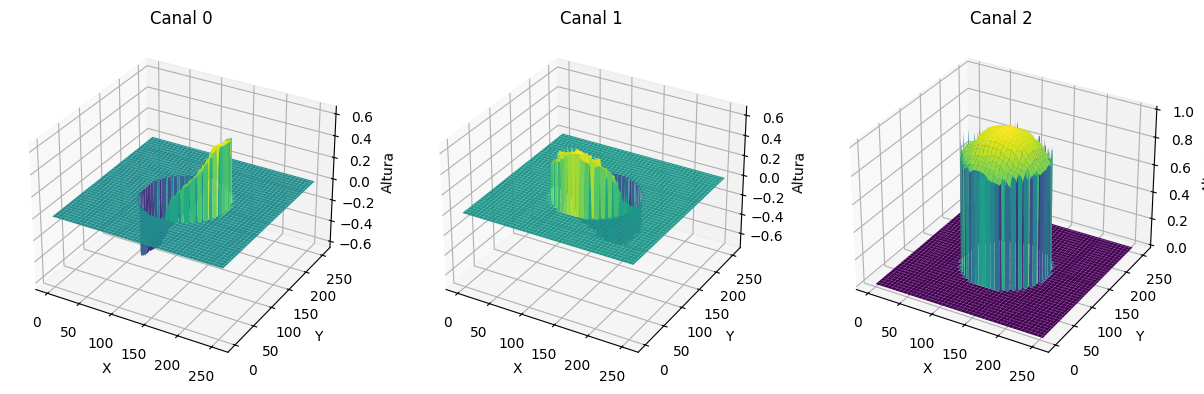

Valores mínimos e máximos do mapa de altura: -9.849067687988281, 1.0557140111923218


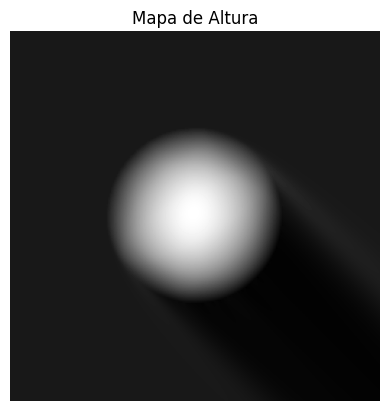

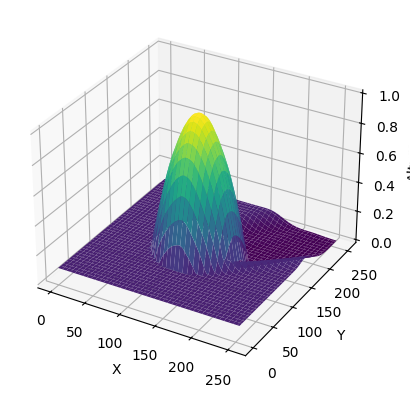

In [5]:

imagem_npy = np.load('/home/lelis/Documents/Projetos/hybrid-stereo-method/data/results/photometric_stereo/ex19_povball-txF_20250113_1433/normal_map.npy')

plotar_canais(imagem_npy)  
plotar_canais_3d(imagem_npy)



# Converte para mapa de altura
height_map = normal_to_height(imagem_npy, scale=0.5)
height_map = 1 - height_map/height_map.max()
#height_map = height_map * mascara

# Salva e exibe o resultado
height_map_output = (height_map * 255).astype(np.uint8)
#cv2.imwrite("height_map_corrected.png", height_map_output)
plt.imshow(height_map, cmap="gray")
plt.title("Mapa de Altura")
plt.axis("off")
plt.show()


plotar_mapa_altura_3d(height_map)

Informações estatísticas dos canais:
Canal 0:
  Mínimo: -0.6636795604028731
  Máximo: 0.6792131002608885
  Média: 0.0004398163353848635
  Desvio Padrão: 0.14978547815389923
Canal 1:
  Mínimo: -0.744198502193761
  Máximo: 0.6829283697025692
  Média: -0.003108316098494865
  Desvio Padrão: 0.16231327006835158
Canal 2:
  Mínimo: 0.0
  Máximo: 0.9999731522176372
  Média: 0.15076388379141076
  Desvio Padrão: 0.32595091923294844


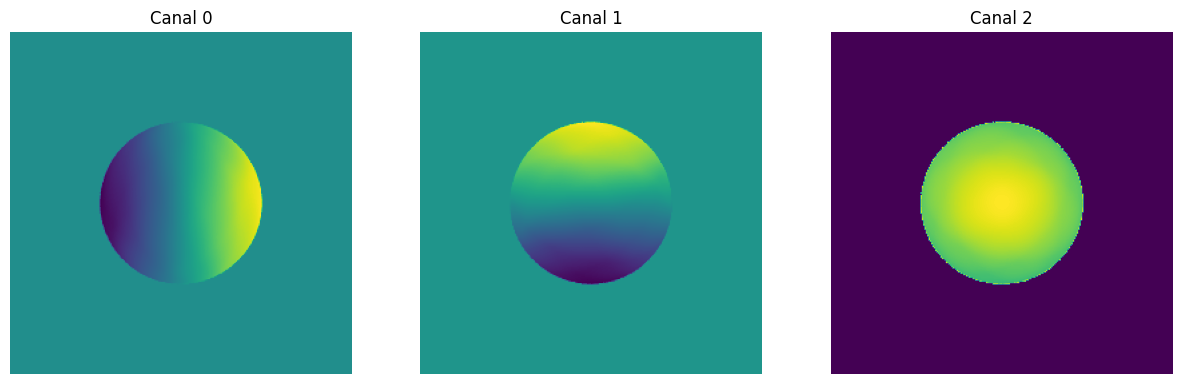

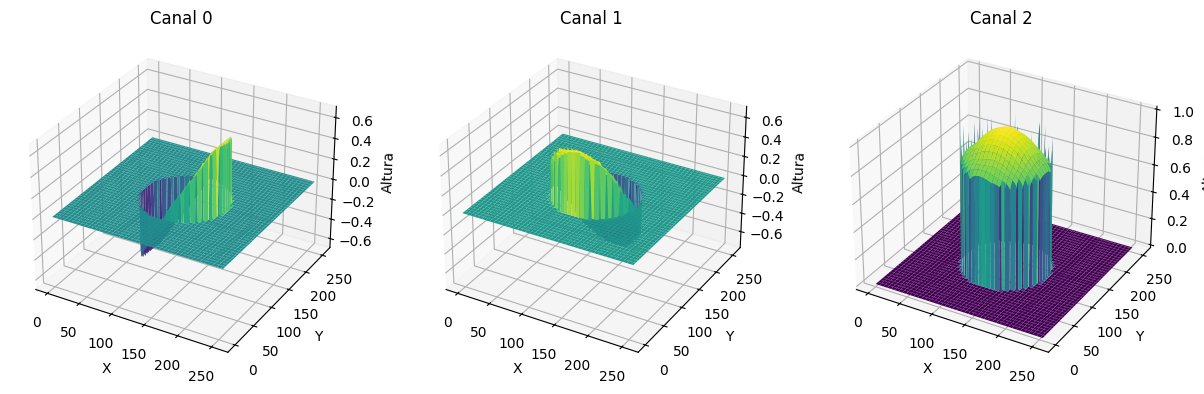

Valores mínimos e máximos do mapa de altura: -112.57225036621094, 17.14655876159668


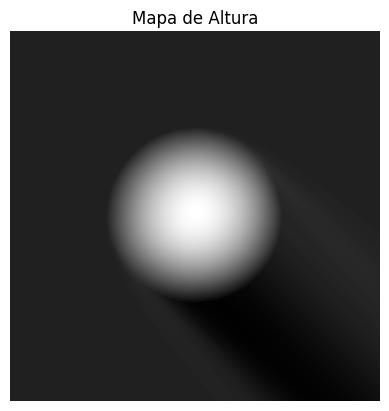

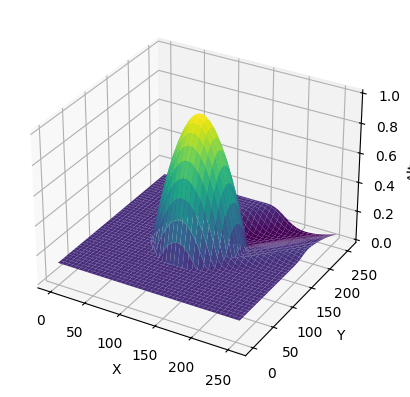

In [7]:

imagem_npy = np.load('/home/lelis/Documents/Projetos/hybrid-stereo-method/data/results/photometric_stereo/ex18_povball-txF_20250108_1746/normal_map.npy')

plotar_canais(imagem_npy)  
plotar_canais_3d(imagem_npy)



# Converte para mapa de altura
height_map = normal_to_height(imagem_npy, scale=5)
height_map = 1 - height_map/height_map.max()
#height_map = height_map * mascara

# Salva e exibe o resultado
height_map_output = (height_map * 255).astype(np.uint8)
#cv2.imwrite("height_map_corrected.png", height_map_output)
plt.imshow(height_map, cmap="gray")
plt.title("Mapa de Altura")
plt.axis("off")
plt.show()


plotar_mapa_altura_3d(height_map)